# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,KA961_c010_a2_FIC,103.046967,0.017544,1286.418879,0.015244,77.052770,1286.418879,87.797436,0.535219,1.837739,...,1.206030,0.196473,0.013892,1.193798,1.253731,0.174319,0.006412,PseudoVoigtModel,PseudoVoigtModel,No
1,KA961_c010_a2_FID,103.044237,0.050042,1286.435325,0.038952,24.350538,1286.435325,23.669725,0.456586,1.249725,...,1.280453,0.239627,0.037501,1.136029,1.132231,0.125142,0.024875,PseudoVoigtModel,PseudoVoigtModel,No
2,KA961_c012_a1_FIA_underglass,103.405603,0.049199,1285.540019,0.045459,30.065809,1285.540019,49.087785,0.633014,1.257697,...,1.001961,0.026104,0.042109,1.142415,1.123853,0.164167,0.022717,PseudoVoigtModel,PseudoVoigtModel,No
3,KA961_c023_a2_FIC,103.332431,0.008328,1285.721346,0.007746,209.385134,1285.721346,345.678122,0.647541,2.119572,...,1.026871,0.125331,0.006185,1.018634,1.015521,0.020459,0.003014,PseudoVoigtModel,PseudoVoigtModel,No
4,KA961_c024_a2_FIB,103.360110,0.012319,1285.623368,0.010815,150.713784,1285.623368,257.835013,0.675541,1.809995,...,1.036832,0.020115,0.008965,1.130435,1.178313,0.139538,0.003792,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4_start_rep1.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 120/120 [00:02<00:00, 52.56it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4_start_rep1.txt,"November 26, 2024\n",November,26.0,5.896,45.0,5.0,50.0,"['0h', '3m', '46s']",12:01:11 PM\n,43271.0,1324.964
1,FG04-A1-4_start_rep2.txt,"November 26, 2024\n",November,26.0,5.895,45.0,5.0,50.0,"['0h', '3m', '47s']",12:05:19 PM\n,43519.0,1324.964
2,KA961_c010_a2_FIC.txt,"November 26, 2024\n",November,26.0,9.992,60.0,4.0,100.0,"['0h', '4m', '2s']",12:22:59 PM\n,44579.0,1324.964
3,KA961_c010_a2_FID.txt,"November 26, 2024\n",November,26.0,9.993,60.0,4.0,100.0,"['0h', '4m', '1s']",12:27:52 PM\n,44872.0,1324.964
4,KA961_c011_a1_FIA.txt,"November 26, 2024\n",November,26.0,10.002,60.0,4.0,50.0,"['0h', '4m', '1s']",12:34:09 PM\n,45249.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4_start_rep1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4_start_rep1', 'FG04-A1-4_start_rep2',
       'KA961_c010_a2_FIC', 'KA961_c010_a2_FID', 'KA961_c011_a1_FIA',
       'KA961_c012_a1_FIA_underglass', 'KA961_c015_a1_FIA',
       'KA961_c016_a1_FIA_r1', 'KA961_c016_a1_FIB_r1',
       'KA961_c016_a1_FIB_r2', 'KA961_c016_a1_FIA_r2',
       'KA961_c016_a2_FIC', 'KA961_c017_a1_FIA', 'KA961_c017_a1_FIB',
       'KA961_c017_a1_FIC', 'KA961_c019_a1_FIA', 'KA961_c020_a1_FIA',
       'KA961_c021_a1_FIA', 'KA961_c022_a1_FIA', 'KA961_c023_a1_FIA',
       'KA961_c023_a2_FIC', 'KA961_c023_a2_FIB', 'KA961_c024_a1_FIA',
       'KA961_c024_a2_FIB', 'KA961_c025_a1_FIA', 'KA961_c026_a1_FIA',
       'KA961_c027_a1_FIA', 'KA961_c027_a1_FIB', 'KA961_c027_a1_FIC',
       'KA961_c028_a1_FIA', 'KA961_c028_a1_FIB', 'KA961_c029_a1_FIA',
       'KA961_c029_a1_FIB', 'KA961_c029_a1_FIC', 'FG04-A1-4_end_rep4',
       'FG04-A1-4_end_rep5', 'FG04-A1-4_end_rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
KA961_c010_a2_FIC


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['KA961_c010_a2_FIC', 'KA961_c010_a2_FID',
       'KA961_c012_a1_FIA_underglass', 'KA961_c023_a2_FIC',
       'KA961_c024_a2_FIB', 'KA961_c028_a1_FIA', 'KA961_c028_a1_FIB',
       'KA961_c029_a1_FIB', 'KA961_c011_a1_FIA', 'KA961_c015_a1_FIA',
       'KA961_c016_a1_FIA_r1', 'KA961_c016_a1_FIB_r1',
       'KA961_c016_a1_FIB_r2', 'KA961_c016_a1_FIA_r2',
       'KA961_c016_a2_FIC', 'KA961_c017_a1_FIA', 'KA961_c017_a1_FIB',
       'KA961_c017_a1_FIC', 'KA961_c019_a1_FIA', 'KA961_c020_a1_FIA',
       'KA961_c021_a1_FIA', 'KA961_c022_a1_FIA', 'KA961_c023_a1_FIA',
       'KA961_c023_a2_FIB', 'KA961_c024_a1_FIA', 'KA961_c025_a1_FIA',
       'KA961_c026_a1_FIA', 'KA961_c027_a1_FIA', 'KA961_c027_a1_FIB',
       'KA961_c027_a1_FIC', 'KA961_c029_a1_FIA', 'KA961_c029_a1_FIC',
       'FG04-A1-4_start_rep1', 'FG04-A1-4_start_rep2',
       'FG04-A1-4_end_rep4', 'FG04-A1-4_end_rep5', 'FG04-A1-4_end_rep6'],
      dtype='<U28')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,KA961_c010_a2_FIC,103.046967,0.017544,1286.418879,0.015244,77.052770,1286.418879,87.797436,0.535219,1.837739,...,November,26.0,9.992,60.0,4.0,100.0,"['0h', '4m', '2s']",12:22:59 PM\n,44579.0,1324.964
1,KA961_c010_a2_FID,103.044237,0.050042,1286.435325,0.038952,24.350538,1286.435325,23.669725,0.456586,1.249725,...,November,26.0,9.993,60.0,4.0,100.0,"['0h', '4m', '1s']",12:27:52 PM\n,44872.0,1324.964
2,KA961_c012_a1_FIA_underglass,103.405603,0.049199,1285.540019,0.045459,30.065809,1285.540019,49.087785,0.633014,1.257697,...,November,26.0,10.009,60.0,4.0,50.0,"['0h', '4m', '1s']",12:40:04 PM\n,45604.0,1324.964
3,KA961_c023_a2_FIC,103.332431,0.008328,1285.721346,0.007746,209.385134,1285.721346,345.678122,0.647541,2.119572,...,November,26.0,9.956,60.0,4.0,50.0,"['0h', '4m', '1s']",2:49:53 PM\n,53393.0,1324.964
4,KA961_c024_a2_FIB,103.360110,0.012319,1285.623368,0.010815,150.713784,1285.623368,257.835013,0.675541,1.809995,...,November,26.0,9.951,60.0,4.0,50.0,"['0h', '4m', '1s']",3:09:12 PM\n,54552.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.347476879773798e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,KA961_c010_a2_FIC,0.035702,0.007947,0.006941,0.003870,102.840356,0.017518,0.000560,0.017544,9.992,...,NaN,NaN,NaN,NaN,NaN,NaN,44579.0,0.997995,0.997990,0.998000
1,KA961_c010_a2_FID,0.034557,0.020166,0.019790,0.003873,102.837469,0.049945,0.000558,0.050042,9.993,...,NaN,NaN,NaN,NaN,NaN,NaN,44872.0,0.997993,0.997988,0.997999
2,KA961_c012_a1_FIA_underglass,0.181412,0.020120,0.019980,0.002371,103.197714,0.049104,0.000556,0.049199,10.009,...,NaN,NaN,NaN,NaN,NaN,NaN,45604.0,0.997990,0.997984,0.997995
3,KA961_c023_a2_FIC,0.146959,0.005102,0.003300,0.003891,103.121140,0.008329,0.000541,0.008328,9.956,...,NaN,NaN,NaN,NaN,NaN,NaN,53393.0,0.997955,0.997950,0.997960
4,KA961_c024_a2_FIB,0.157714,0.006260,0.004876,0.003925,103.148281,0.012306,0.000544,0.012319,9.951,...,NaN,NaN,NaN,NaN,NaN,NaN,54552.0,0.997951,0.997945,0.997956


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.347476879773798e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,KA961_c010_a2_FIC,0.035702,0.007947,0.006941,0.003870,102.840356,0.017518,0.000560,0.017544,9.992,...,NaN,NaN,NaN,NaN,NaN,NaN,44579.0,0.997995,0.997990,0.998000
1,KA961_c010_a2_FID,0.034557,0.020166,0.019790,0.003873,102.837469,0.049945,0.000558,0.050042,9.993,...,NaN,NaN,NaN,NaN,NaN,NaN,44872.0,0.997993,0.997988,0.997999
2,KA961_c012_a1_FIA_underglass,0.181412,0.020120,0.019980,0.002371,103.197714,0.049104,0.000556,0.049199,10.009,...,NaN,NaN,NaN,NaN,NaN,NaN,45604.0,0.997990,0.997984,0.997995
3,KA961_c023_a2_FIC,0.146959,0.005102,0.003300,0.003891,103.121140,0.008329,0.000541,0.008328,9.956,...,NaN,NaN,NaN,NaN,NaN,NaN,53393.0,0.997955,0.997950,0.997960
4,KA961_c024_a2_FIB,0.157714,0.006260,0.004876,0.003925,103.148281,0.012306,0.000544,0.012319,9.951,...,NaN,NaN,NaN,NaN,NaN,NaN,54552.0,0.997951,0.997945,0.997956


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_November 26, 2024_fitted_2024-11-26.xlsx


## This helps visualize the errors on each spectra 

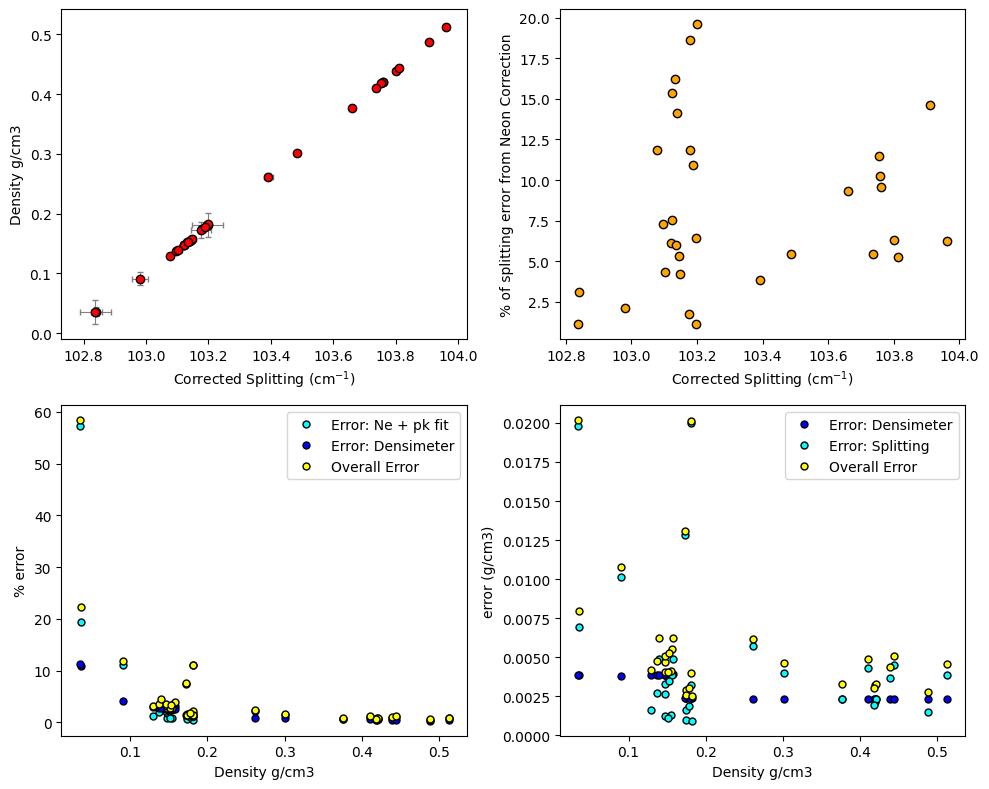

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

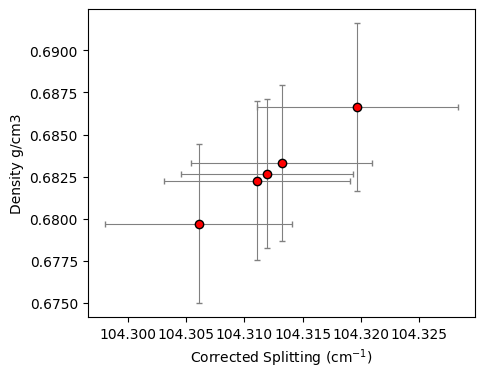

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

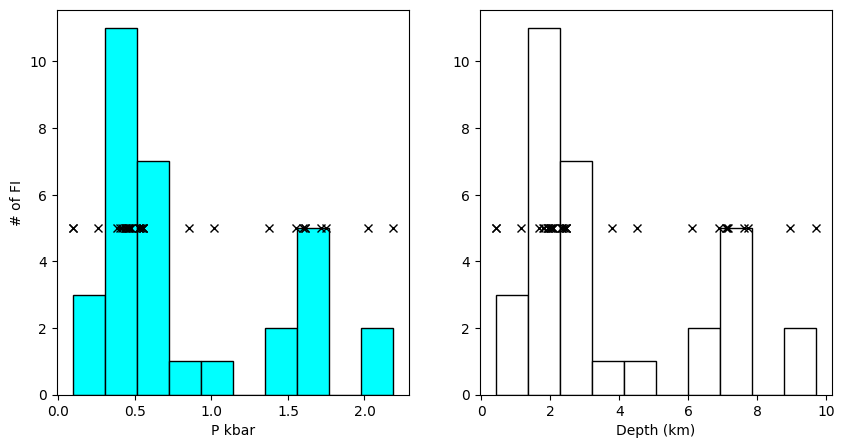

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()